Сегодня мы попробуем поработать с библиотекой scikit-learn. Эта библиотека включает в себя множество алгоритмов, несколько тестовых наборов данных, функции для подсчета метрик и подбора параметров.

---

Scikit-learn появился как проект David Cournapeau на Google Summer of Code. Позднее к проекту присоединились другие разработчики, и первый релиз библиотеки состоялся 1 февраля 2010 года. Она быстро стало популярной за большое количество алгоритмов и простоту использования. sklearn полезна для экспериментов,  написания быстрых прототипов, участия в соревнованиях по анализу данных и во множестве других приложения. В тоже время, для промышленных проектов она может не подходить ввиду не оптимизированного кода и выбранного языка.



Возьмем стандартный [датасет](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) со стоимостью жилья в различных районах Калифорнии в 1990 году.  Датасет содержит информацию о средних ценах на жилье в районе и какие-то параметры района: средний возраст домов, среднее число комнат, население

In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

Можно посмотреть, какие признаки есть в данных

In [ ]:
data['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Прочитать описание датасета можно выполнив строчку: `print(data.DESCR)`

In [ ]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
X, y = data['data'], data['target']

In [ ]:
print("Размер матрицы объектов: ", X.shape)
print("Рaзмер вектора y: ", y.shape)

Размер матрицы объектов:  (20640, 8)
Рaзмер вектора y:  (20640,)


In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Посмотрим на наши данные. Давайте построим  график того, как зависит цена от среднего числа комнат. Для этого воспользуемся библиотекой matplotlib.

In [ ]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Price')

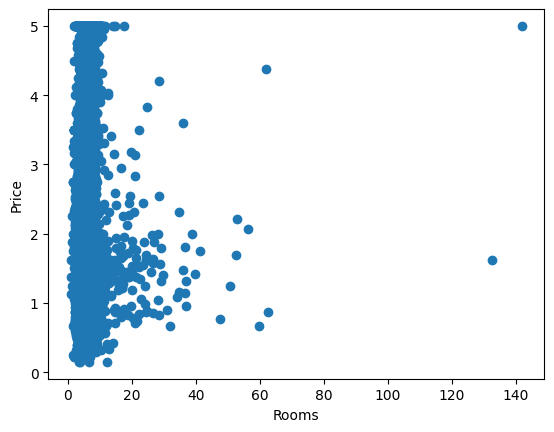

In [ ]:
plt.scatter(X['AveRooms'], y)
plt.xlabel('Rooms')
plt.ylabel('Price')

Видим небольшую зависимость между стоимостью жилья и средним числом комнат

In [ ]:
from sklearn.model_selection import train_test_split

С помощью функции `train_test_split` разобьем выборку на `train` и `test`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

В sklearn, разные методы лежат в разных модулях. Например в linear_model находятся линейные модели, в neighbors - методы основанные на ближайших соседях.

Импортируем алгоритм knn из sklearn. Работа с алгоритмами машинного обучения в библиотеке состоит из трех этапов.



1.   Создание объекта, который будет реализовывать алгоритм.
2.   Вызов `fit`: обучение модели на тренировочной подвыборке
3.   Вызов `predict`: получение предсказаний на тестовой выборке



In [ ]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
predictions = knn.predict(X_test)

Отлично! Мы получили предсказания. Посчитаем метрику, соответствующая функция есть в scikit-learn! Будет считать средне квадратичную ошибку, так как мы решаем задачу регрессии.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, predictions)

1.1132091088549494

Давайте попробуем сделать лучше! У нашего алгоритма есть множество гиперпараметров: количество соседей, параметры метрики и веса. Запустим поиск по сетке гиперараметров, алгоритм переберет все возможные комбинации, посчитает метрику для каждого набора и выдаст лучший набор.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_searcher = GridSearchCV(KNeighborsRegressor(),
                             param_grid={'n_neighbors': range(1, 40, 2),
                                         'weights': ['uniform', 'distance'],
                                         'p': [1, 2, 3]},
                             cv=5)

Параметр cv=5 говорит, что во время поиска оптимальных парамертов будет использоваться кросс-валидация с 5 фолдами. Давайте вспомним, что это такое:

<img src="https://lh4.googleusercontent.com/lj2R5pzcABa21Q1hVnJlBlL6gx9ggnsibxVRo3xuHQ5tZ6xjVwuDr9Gejr-xrVhUmtqPaEO0u4U85MPOHL2zPrxjPbueYikQhB6-BSLWPXogkOo9cRoYBxzSJOW45NXrzkLHYPxIh4hvCO3EUsVfHw">

В нашем случае, выборка будет разделена на 5 частей и на каждой из 5 итераций, часть данных будет становиться тестовой выборкой, а другая часть - обучающей. Посчитав метрики на каждой итерации, мы сможем усреднить их в конце и получить достаточно точную оценку качества нашего алгоритма.

In [ ]:
grid_searcher.fit(X_train, y_train);

Попросим предсказание лучшей модели.

In [ ]:
best_predictions = grid_searcher.predict(X_test)

In [ ]:
mean_squared_error(y_test, best_predictions)

0.9596831929197687

Давайте посмотрим на качество алгоритма в зависимости от количества соседей. Качество будем оценивать на обучающей выборке


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
metrics = []
for n in range(1, 40, 2):
  knn = KNeighborsRegressor(n_neighbors=n)
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  metrics.append(np.mean(scores))

In [ ]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Number of neightbors')

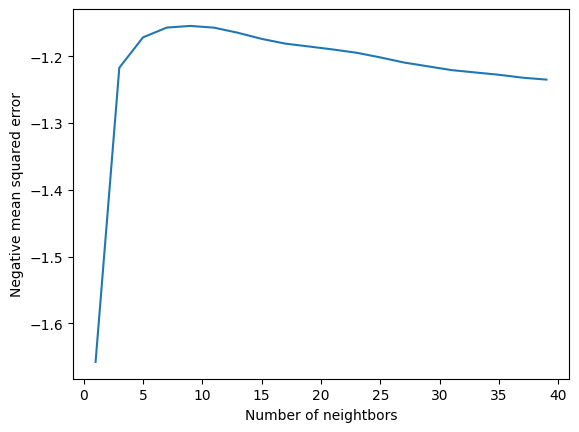

In [ ]:
plt.plot(range(1, 40, 2), metrics)
plt.ylabel('Negative mean squared error')
plt.xlabel('Number of neightbors')

Помимо готовых датасетов, в библиотеке sklearn можно найти функции для генерации искусственных данных. Давайте сгенерируем датасет для классификации и визуализируем его.

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.2)

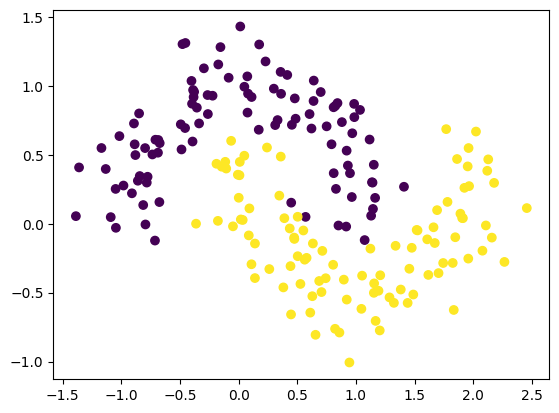

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Мы получили два слегка зашумленных месяца. Давайте обучим knn на этих данных и визуализируем пространство предсказаний.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X, y)

KNeighborsClassifier()

Для визуализации построим массив, который будет содержать в себе все точки в окрестности данных с некоторым шагом.

In [ ]:
x_grid, y_grid = np.meshgrid(np.linspace(-2.0, 3.0, 100), np.linspace(-2.0, 2.0, 100))
xy = np.stack([x_grid, y_grid], axis=2).reshape(-1, 2)
xy

array([[-2.        , -2.        ],
       [-1.94949495, -2.        ],
       [-1.8989899 , -2.        ],
       ...,
       [ 2.8989899 ,  2.        ],
       [ 2.94949495,  2.        ],
       [ 3.        ,  2.        ]])

In [ ]:
predicted = knn_clf.predict(xy)

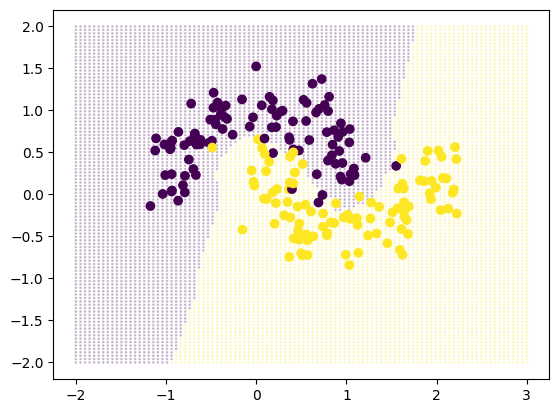

In [ ]:
plt.scatter(xy[:, 0], xy[:, 1], c=predicted, alpha=0.2, s=1)
plt.scatter(X[:, 0], X[:, 1], c=y)

На картинке вы можете увидеть исходные данные и границу, которую knn возвел между классами. Поэксперементируйте с параметром n_neighbors и посмотрите, как он влияет на итоговый результат.